<a href="https://colab.research.google.com/github/KianaLaBella/co2emissions/blob/main/Kiana_LaBella_MATH_2315_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 

sns.set_style("whitegrid")

import missingno as msno

## Lab introduction

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

Using Pandas, I uploaded the greenhouse gas emission data to this notebook. I titled it "emitters."

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

By uploading the data, I am now able to write my code to better analyze and understand the contents of this pre-made dataframe. 

This dataframe contains data from continents and the world, which I do not want to analyze. The purpose of this lab is to look only at the co2 emissions of individual countries, so I have to get rid of the data from the continents and world. I did this by first 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [4]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [5]:
df = df.loc[df['country'].isin(non_countries) == False]

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

In [6]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

Every Non-Null variable that is less than the max amount of variables (46523) is recorded incorrectly. For example, the iso_code is incorrect because 39862 is less that 46523. Therefore, we are missing variables for these columns. Additionally, every continuous number should be given by a float64. It seems as though the info is following this rule. 

##### $\rightarrow$ What years are present in the data set?

In [8]:
df['year']

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

The years range from 1850 to 2021.

## Analysis of top emissions in 2020

The top 10 emitters of total CO$_2$ in 2020:



In [9]:
df[df['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

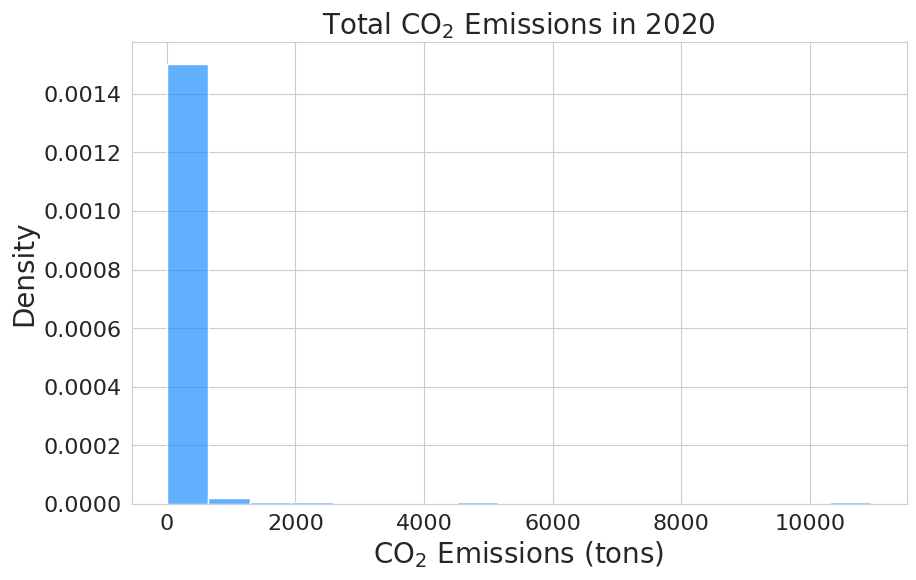

In [10]:
plt.figure(figsize = (10,6))

sns.histplot(data = df[df['year'] == 2020], x = 'co2', bins = 17, color = 'dodgerblue', alpha = 0.7, stat = 'density')

plt.ylabel('Density',fontsize = 20)
plt.xlabel('CO$_2$ Emissions (tons)',fontsize = 20)
plt.title('Total CO$_2$ Emissions in 2020', fontsize = 20)

plt.tick_params(labelsize = 16);

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

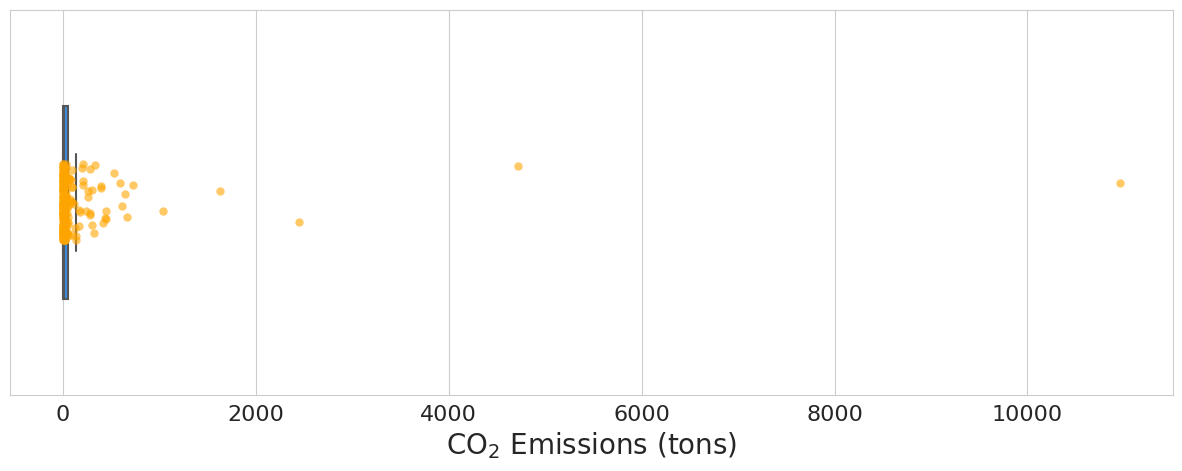

In [11]:
plt.figure(figsize = (15,5))

sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)

sns.stripplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

plt.xlabel('CO$_2$ Emissions (tons)', fontsize = 20)

plt.tick_params(labelsize = 16);

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

By reviewing the graphs, it is clear to see that the top 10 CO2 emitters in 2020 are stong outliers in the total distribution. China is most notably skewing the data. Because of its extremely large value of CO2 emissions, it is making the data of the other countries look small in comparison on the graphs. 

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

In [12]:
df.isna()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
46519,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
46520,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
46521,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False


##### Solution

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

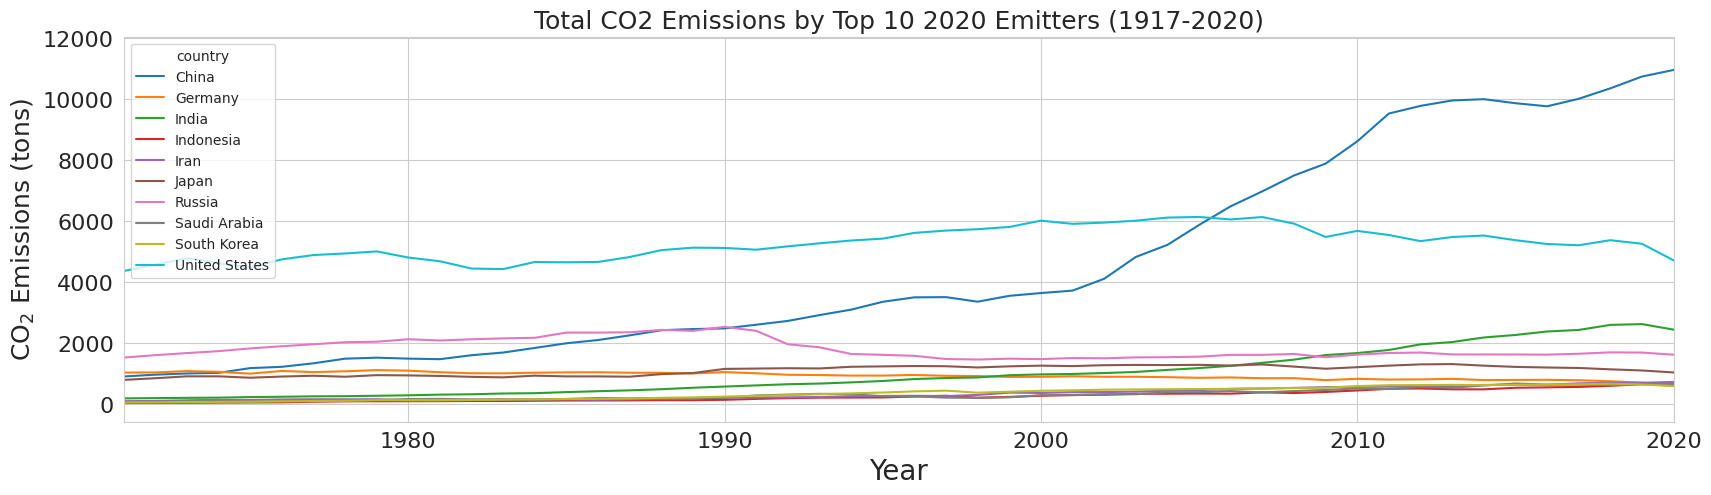

In [13]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China','United States','Russia','India','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], 
             x='year', 
             y='co2', 
             hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO$_2$ Emissions (tons)', fontsize = 18)
plt.xlim(1971,2020)
plt.title('Total CO2 Emissions by Top 10 2020 Emitters (1917-2020)', fontsize = 18)

plt.tick_params(labelsize = 16);

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

<ipython-input-14-76c601af1e77>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df.groupby('year').mean(),


<Axes: title={'center': 'Total CO2 Emissions by Top 10 2020 Emitters (1917-2020)'}, xlabel='Year', ylabel='CO$_2$ Emissions (tons)'>

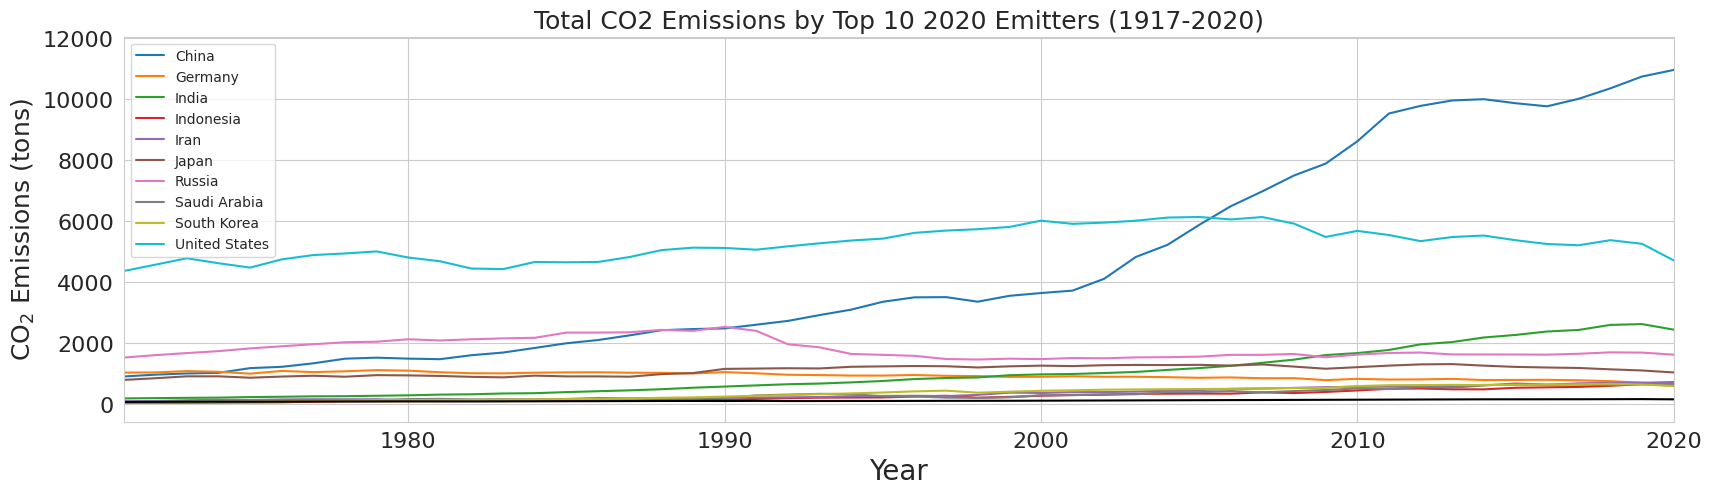

In [14]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China','United States','Russia','India','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], 
             x='year', 
             y='co2', 
             hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO$_2$ Emissions (tons)', fontsize = 18)
plt.xlim(1971,2020)
plt.title('Total CO2 Emissions by Top 10 2020 Emitters (1917-2020)', fontsize = 18)

plt.tick_params(labelsize = 16);

sns.lineplot(data = df.groupby('year').mean(),
             x = 'year',
             y = 'co2',
             color = 'k')

##### Solution

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

<ipython-input-20-8add5781985f>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df.groupby('year').mean(),


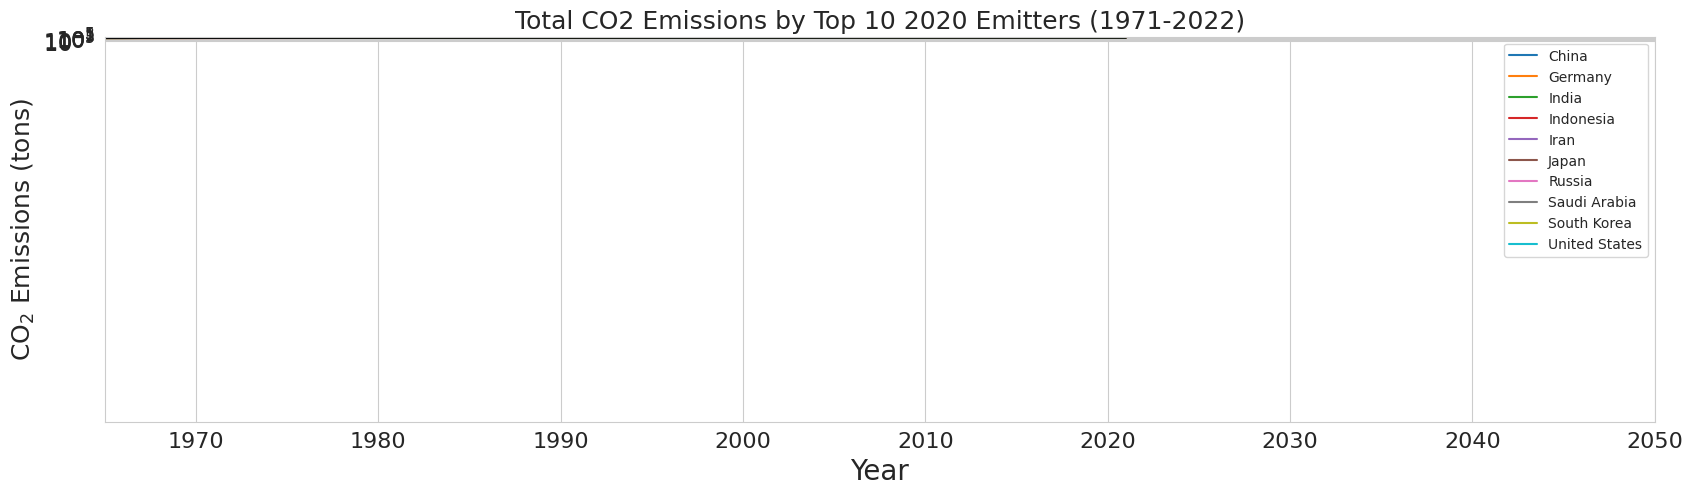

In [20]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China','United States','Russia','India','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], 
             x='year', 
             y='co2', 
             hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO$_2$ Emissions (tons)', fontsize = 18)
plt.xlim(1965,2050)
plt.ylim()
plt.title('Total CO2 Emissions by Top 10 2020 Emitters (1971-2022)', fontsize = 18)

plt.tick_params(labelsize = 16);

sns.lineplot(data = df.groupby('year').mean(),
             x = 'year',
             y = 'co2',
             color = 'k')

plt.yscale('log')

##### Solution

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution